In [91]:
# import numpy as np
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
# from datetime import datetime
# import requests
# from io import BytesIO
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# import itertools
# import warnings

import statsmodels.api as sm # helps to decompose the data, so that models can be picked

from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.varmax import VARMAX

In [10]:
# sets the plot size, so that I can acutally see, what I am plotting

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [68]:

data = pd.read_csv("hurricane2005_Dennis.csv", index_col=0, parse_dates=['Date1'])
# data = pd.read_csv("hurricane2005_Katrina.csv", index_col=0, parse_dates=['Date1'])

In [69]:
data.head()

,Date1,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,MinimumPressure
Name,,,,,,,,,
DENNIS,2005-06-01,20050704,1800,,TD,12.0,-60.8,25,1010
DENNIS,2005-06-02,20050704,2100,L,TD,12.1,-61.6,30,1010
DENNIS,2005-06-03,20050705,0,,TD,12.2,-62.5,30,1009
DENNIS,2005-06-04,20050705,600,,TD,12.5,-64.2,30,1008
DENNIS,2005-06-05,20050705,1200,,TS,13.0,-65.9,35,1007


In [70]:
data = data.set_index('Date1')

In [50]:
# create the dataset with only the variable of interest

data_MP = data[['MinimumPressure']].copy()

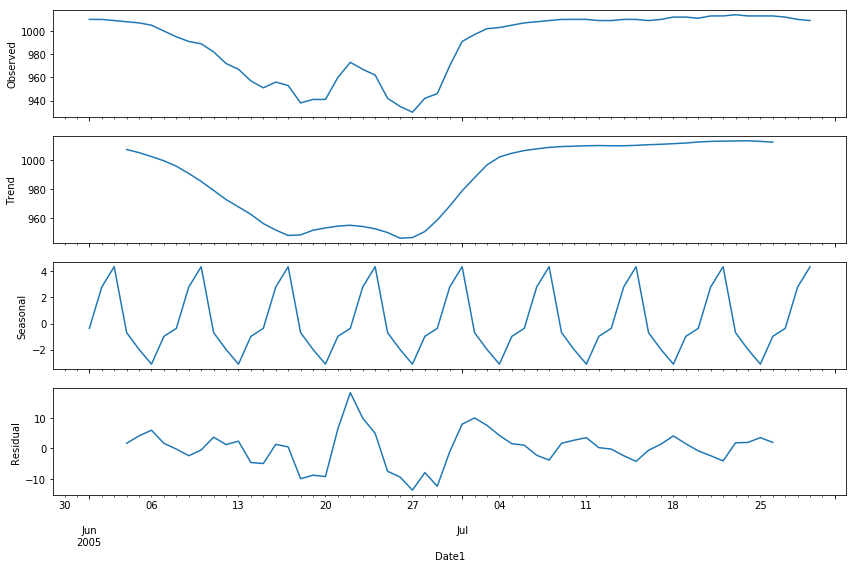

In [48]:
# decompose, to see, what model is appropriate to use

decomposition = sm.tsa.seasonal_decompose(data_MP)
ax = decomposition.plot()
plt.show()

## We have determened that we can use SARIMA(x) model, so we are going to find the best fitting model now

In [49]:
# I am using machine learning to get the best model for the new prediction target

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [51]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['MinimumPressure'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:966.6383646919488
ARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:797.306244373455
ARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:485.94638970948364
ARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:418.0675776246278
ARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:496.7152504387698
ARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:489.8240572464287
ARIMA(0, 0, 0)x(1, 1, 0, 7)12 - AIC:429.06940779881137
ARIMA(0, 0, 0)x(1, 1, 1, 7)12 - AIC:418.0959035872956
ARIMA(0, 0, 1)x(0, 0, 0, 7)12 - AIC:877.2580167115685
ARIMA(0, 0, 1)x(0, 0, 1, 7)12 - AIC:721.6764608289374
ARIMA(0, 0, 1)x(0, 1, 0, 7)12 - AIC:424.6787733434178
ARIMA(0, 0, 1)x(0, 1, 1, 7)12 - AIC:364.18244460881743
ARIMA(0, 0, 1)x(1, 0, 0, 7)12 - AIC:500.59598110732793
ARIMA(0, 0, 1)x(1, 0, 1, 7)12 - AIC:429.64635727237817
ARIMA(0, 0, 1)x(1, 1, 0, 7)12 - AIC:381.99690429776075
ARIMA(0, 0, 1)x(1, 1, 1, 7)12 - AIC:366.1713307464858
ARIMA(0, 1, 0)x(0, 0, 0, 7)12 - AIC:389.49676488761196
ARIMA(0, 1, 0)x(0, 0, 1, 7)12 - AIC:349.22520025896813
ARIMA(0, 1, 0)x(0, 1,

In [71]:
mod = sm.tsa.statespace.SARIMAX(data['MinimumPressure'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                   MinimumPressure   No. Observations:                   59
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -143.237
Date:                           Sat, 24 Nov 2018   AIC                            294.474
Time:                                   11:02:36   BIC                            301.425
Sample:                               06-01-2005   HQIC                           297.022
                                    - 07-29-2005                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5748      0.236      2.435      0.015       0.112       1.037
ma.L1         -0.0370      0.357     -0.104

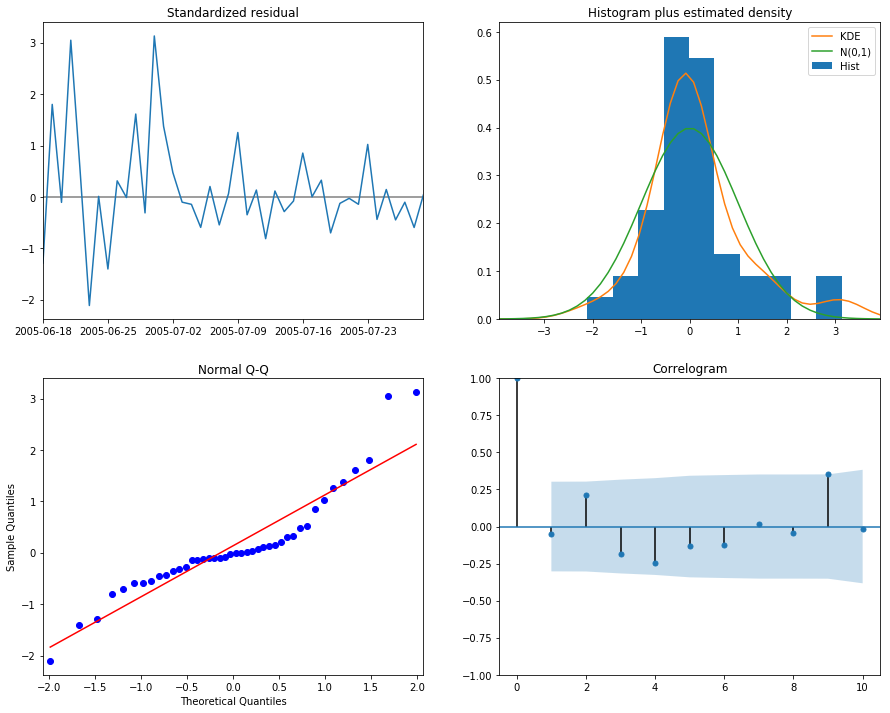

In [72]:
# run some diagnostics

results.plot_diagnostics(figsize=(15, 12))
plt.show()

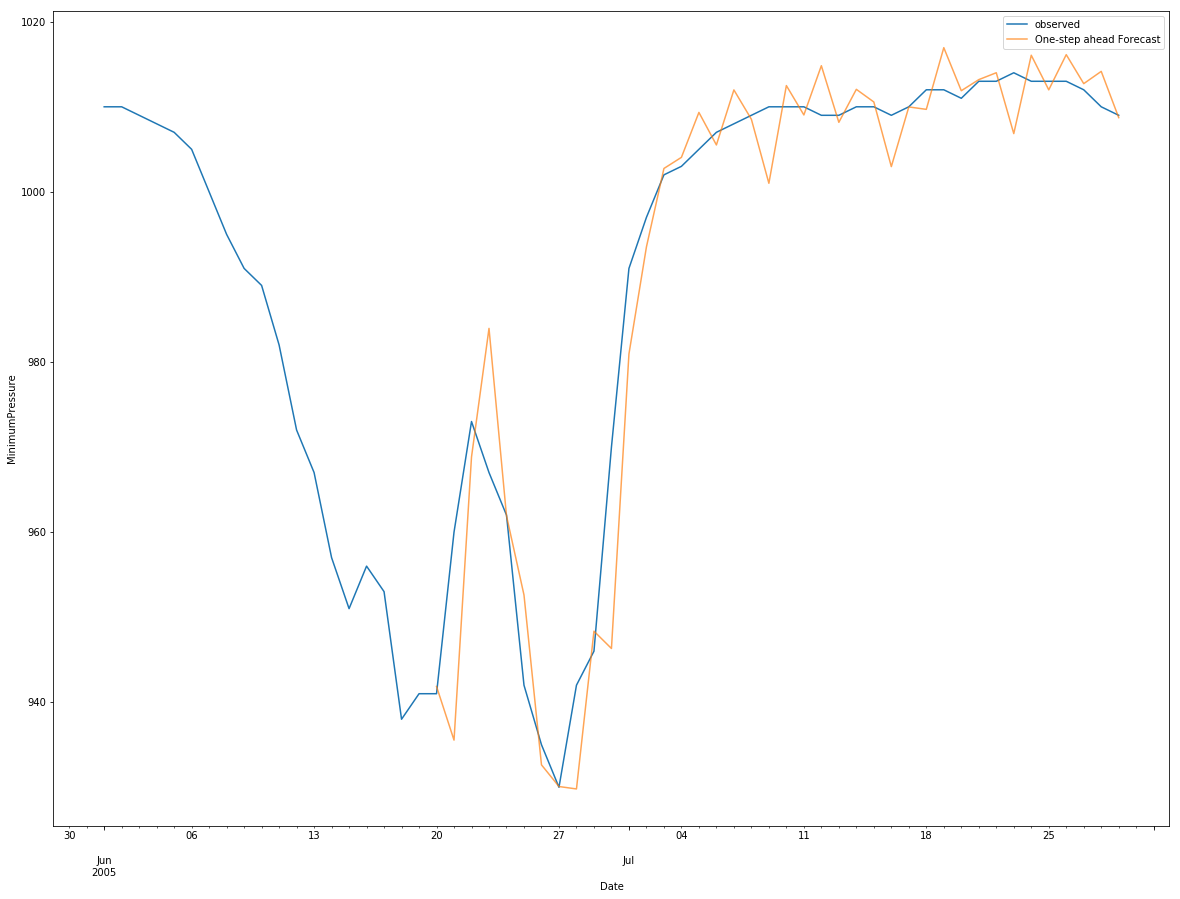

In [73]:
# and look how my model does predicting for next period	

pred = results.get_prediction(start=pd.to_datetime('2005-06-20'), dynamic=False)
pred_ci = pred.conf_int()

ax = data['MinimumPressure']['2005':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')
plt.legend()

plt.show()

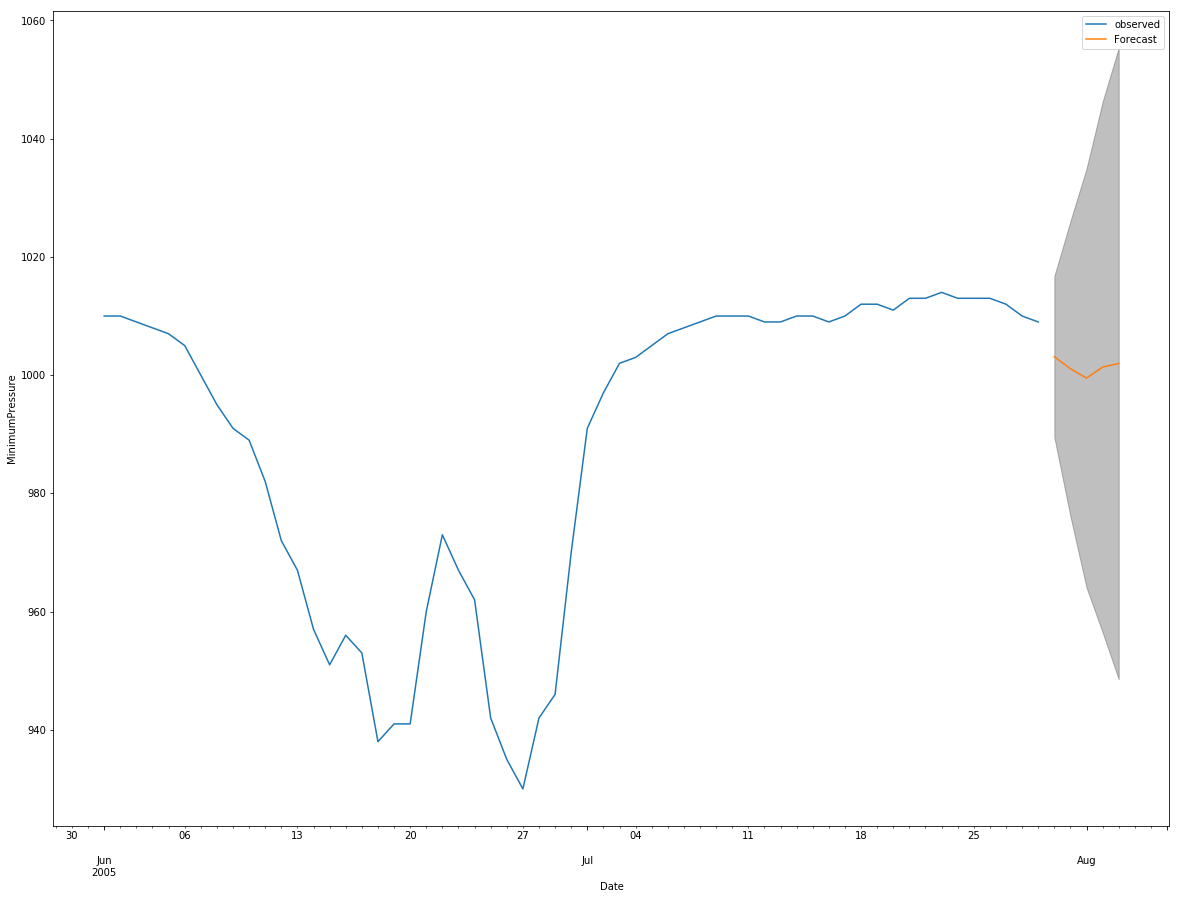

In [74]:
# and for 5 periods into future

# Get forecast 5 steps ahead in future
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = data['MinimumPressure'].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')

plt.legend()
plt.show()

## We are done with simple models, time to move on and try more variables and VAR

In [83]:
df = pd.read_csv("hurricanes_nadine.csv", parse_dates=[['Date', 'Time']])

df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H:%M')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time
mdata = data[['MinimumPressure','sst']]

ADF Statistic: -4.016546
p-value: 0.001326
ADF Statistic: -1.179501
p-value: 0.682351
Number of NAs
MinimumPressure    0
sst                0
dtype: int64


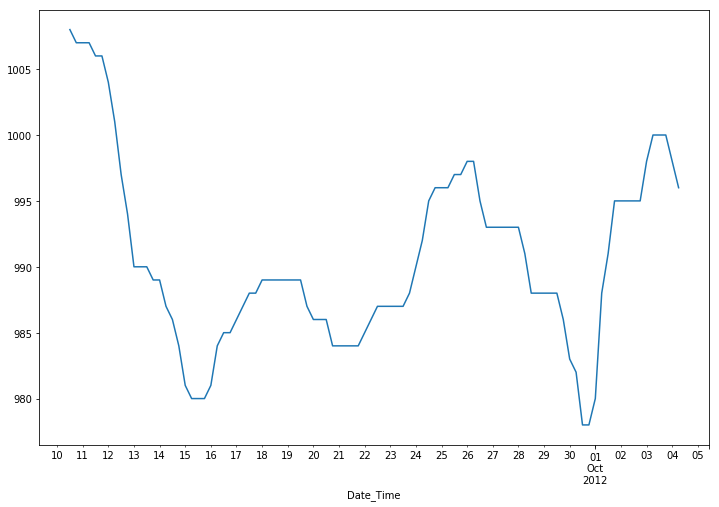

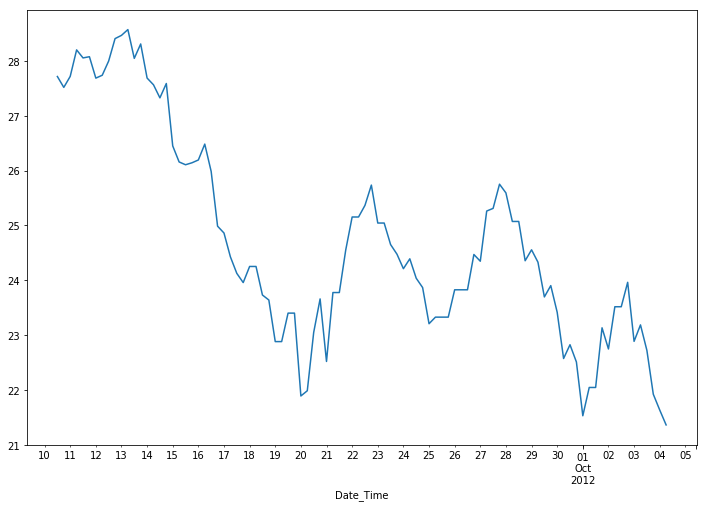

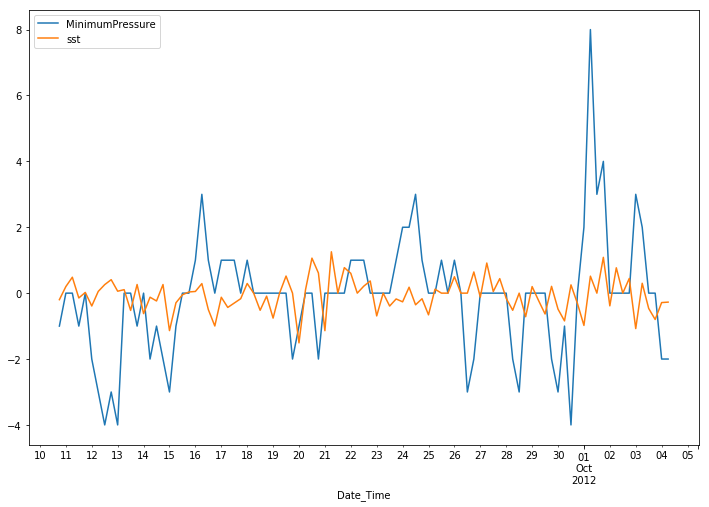

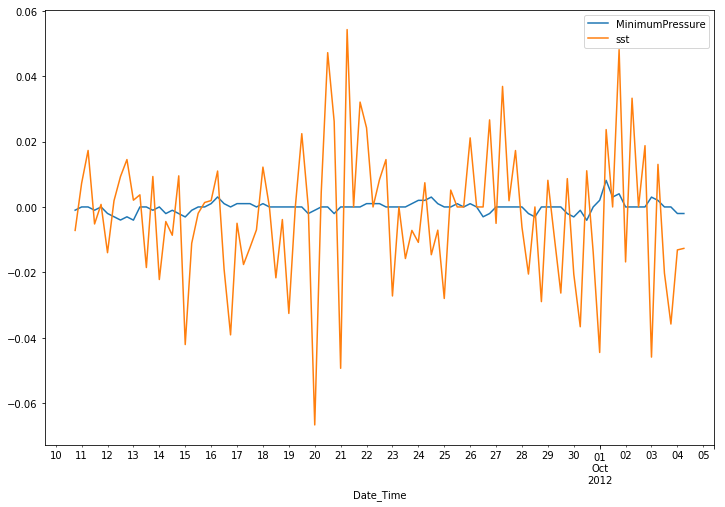

In [88]:
for X in [mdata.MinimumPressure, mdata.sst]:
    result = adfuller(X) # realinv # realgdp
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

print('Number of NAs')
print(mdata.isna().sum()) # there were no na, so nothing was dropped
mdata.MinimumPressure.plot()
plt.show()
mdata.sst.plot()
plt.show()
mdata.diff().plot()
plt.show()
np.log(mdata).diff().plot()
plt.show()
# logged it because they increase exponentially, so logging linearizes it.
# the lines are not stationary as we can see with the unit-root being close to 0, so taking the diff will make them mean 0.

In [107]:
# I am using machine learning to get the best model for the new prediction target

# Define the v1, and v2 parameters to take any value between 0 and 3
v1 = v2 = range(0, 3)

# Generate all different combinations of v1 and v2 doubles
v1v2 = list(itertools.product(v1, v2))

# Generate all different combinations of v1 and v2 doubles
param = [(x[0], x[1]) for x in list(itertools.product(v1, v2))]

print('Examples of parameter combinations for VAR...')
print('VAR: {}'.format(param[1]))
print('VAR: {}'.format(param[4]))
print('VAR: {}'.format(param[6]))
print('VAR: {}'.format(param[8]))

Examples of parameter combinations for VAR...
VAR: (0, 1)
VAR: (1, 1)
VAR: (2, 0)
VAR: (2, 2)


In [99]:
mdata_diff = mdata.diff()

In [100]:
for param in v1v2:
    try:
        mod = sm.tsa.VARMAX(mdata_diff[['MinimumPressure','sst']],
                                            order=param)

        results = mod.fit(maxiter=1000, disp=False)

        print('VAR: {} - AIC:{}'.format(param, results.aic))
    except:
        continue

VAR: (0, 1) - AIC:506.5034583754946
VAR: (0, 2) - AIC:496.37323776703636
VAR: (0, 3) - AIC:498.4672635592931
VAR: (0, 4) - AIC:502.6957979430045
VAR: (0, 5) - AIC:503.805194349276
VAR: (1, 0) - AIC:493.37127175958034
VAR: (1, 1) - AIC:489.2840277313889
VAR: (1, 2) - AIC:495.62382035059534
VAR: (1, 3) - AIC:495.3683089843129
VAR: (1, 4) - AIC:504.24282479674986
VAR: (1, 5) - AIC:504.56986150313804
VAR: (2, 0) - AIC:500.05611783064614
VAR: (2, 1) - AIC:497.71546110857946
VAR: (2, 2) - AIC:488.8777350188483
VAR: (2, 3) - AIC:496.98207513814157
VAR: (2, 4) - AIC:496.6208025228191
VAR: (2, 5) - AIC:508.1172695142833
VAR: (3, 0) - AIC:498.7411546495814
VAR: (3, 1) - AIC:503.11878636537534
VAR: (3, 2) - AIC:501.55023618890993
VAR: (3, 3) - AIC:504.9153018858606
VAR: (3, 4) - AIC:494.0561355223863
VAR: (3, 5) - AIC:513.3620560480543
VAR: (4, 0) - AIC:500.2611526259599
VAR: (4, 1) - AIC:500.4798470080402
VAR: (4, 2) - AIC:496.7671947316341
VAR: (4, 3) - AIC:497.05487650086206
VAR: (4, 4) - AIC:

In [102]:
mdata_log_diff = np.log(mdata).diff().dropna()

In [103]:
for param in v1v2:
    try:
        mod = sm.tsa.VARMAX(mdata_log_diff[['MinimumPressure','sst']],
                                            order=param)

        results = mod.fit(maxiter=1000, disp=False)

        print('VAR: {} - AIC:{}'.format(param, results.aic))
    except:
        continue

VAR: (0, 1) - AIC:-1405.4122095224366
VAR: (0, 2) - AIC:-1408.0800241452762
VAR: (0, 3) - AIC:-1405.349411813463
VAR: (0, 4) - AIC:-1400.70891483409
VAR: (0, 5) - AIC:-1400.5224631328863
VAR: (1, 0) - AIC:-1419.8359403880686
VAR: (1, 1) - AIC:-1411.9907792948738
VAR: (1, 2) - AIC:-1409.2303230983177
VAR: (1, 3) - AIC:-1405.2725701936974
VAR: (1, 4) - AIC:-1403.2575087541372
VAR: (1, 5) - AIC:-1401.465903951078
VAR: (2, 0) - AIC:-1412.8330012063066
VAR: (2, 1) - AIC:-1404.8606076761769
VAR: (2, 2) - AIC:-1400.627576489279
VAR: (2, 3) - AIC:-1397.0832414409795
VAR: (2, 4) - AIC:-1393.752814203248
VAR: (2, 5) - AIC:-1393.8554857417041
VAR: (3, 0) - AIC:-1414.8215998677383
VAR: (3, 1) - AIC:-1406.983228710987
VAR: (3, 2) - AIC:-1399.1490807875512
VAR: (3, 3) - AIC:-1392.0487243659163
VAR: (3, 4) - AIC:-1389.5025973029128
VAR: (3, 5) - AIC:-1384.3065535822288
VAR: (4, 0) - AIC:-1413.6682262849602
VAR: (4, 1) - AIC:-1405.780147246754
VAR: (4, 2) - AIC:-1397.9892202365243
VAR: (4, 3) - AIC:-1

In [108]:
mod_11 = sm.tsa.VARMAX(mdata_diff[['MinimumPressure','sst']], order=(1,1))
res_11 = mod_11.fit(maxiter=1000, disp=False)

In [109]:
mod_22 = sm.tsa.VARMAX(mdata_diff[['MinimumPressure','sst']], order=(2,2))
res_22 = mod_22.fit(maxiter=1000, disp=False)

### predicting VAR models with just difference

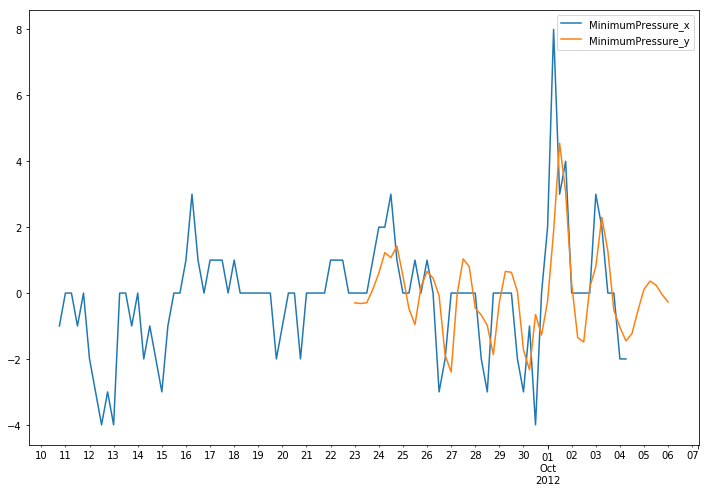

In [111]:
predict = res_11.predict(start='2012-09-23', end='2012-10-06')
test = mdata_diff.merge(predict, how="outer", left_index=True, right_index=True)
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = test[['MinimumPressure_x','MinimumPressure_y']].plot(ax=ax)
plt.show()

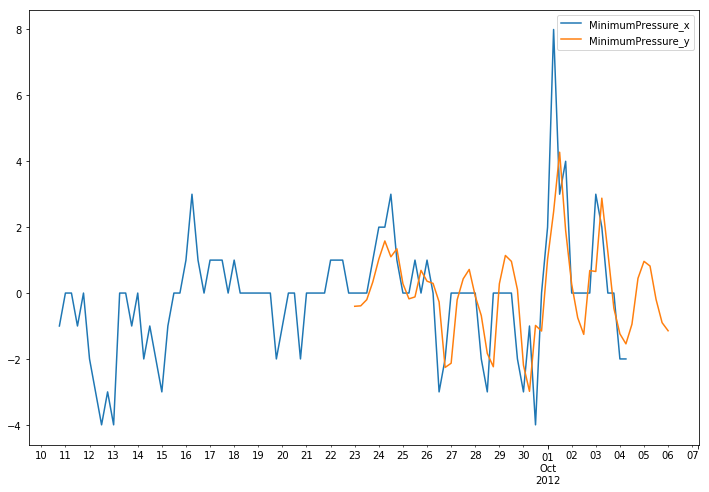

In [112]:
predict = res_22.predict(start='2012-09-23', end='2012-10-06')
test = mdata_diff.merge(predict, how="outer", left_index=True, right_index=True)
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = test[['MinimumPressure_x','MinimumPressure_y']].plot(ax=ax)
plt.show()

### Predicting VAR models with log and difference

In [113]:
mod_10 = sm.tsa.VARMAX(mdata_log_diff[['MinimumPressure','sst']], order=(1,0))
res_10 = mod_10.fit(maxiter=1000, disp=False)

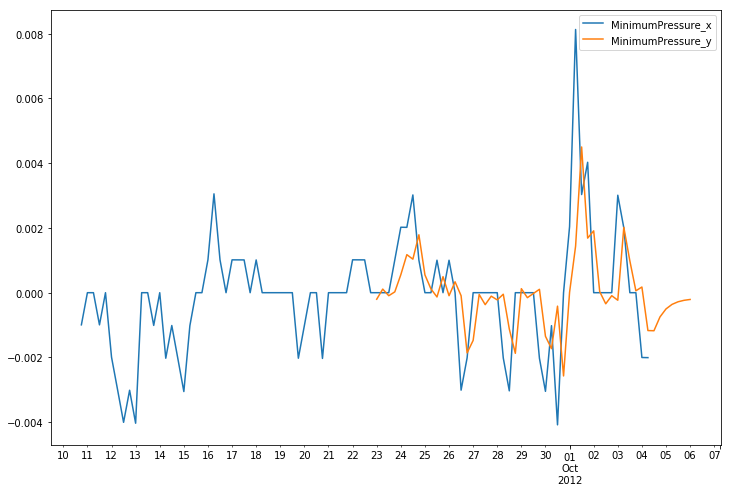

In [114]:
predict = res_10.predict(start='2012-09-23', end='2012-10-06')
test = mdata_log_diff.merge(predict, how="outer", left_index=True, right_index=True)
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = test[['MinimumPressure_x','MinimumPressure_y']].plot(ax=ax)
plt.show()